<font size="2"> [github.com/jankoslavic/pypinm](http://github.com/jankoslavic/pypinm)</font>

<center>
<img width=300 src="./fig/ladisk.png">
<br>
<font size="7" color="f00e0e" face="garamond"><b>Numerično reševanje diferencialnih enačb - začetni problem</b></font>
<br><br>
<font size="4">
[izr. prof. dr. Janko Slavič](http://www.ladisk.si/~slavic)
</font>
<br><br>
<font size="2">Oktober 2017 </font>
</center>

# Table of Contents
 <p><div class="lev1 toc-item"><a href="#Uvod" data-toc-modified-id="Uvod-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Uvod</a></div><div class="lev2 toc-item"><a href="#Zapis-(ene)-diferencialna-enačba" data-toc-modified-id="Zapis-(ene)-diferencialna-enačba-11"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Zapis (ene) diferencialna enačba</a></div><div class="lev1 toc-item"><a href="#Eulerjeva-metoda" data-toc-modified-id="Eulerjeva-metoda-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Eulerjeva metoda</a></div><div class="lev2 toc-item"><a href="#Napaka-Eulerjeve-metode" data-toc-modified-id="Napaka-Eulerjeve-metode-21"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Napaka Eulerjeve metode</a></div><div class="lev2 toc-item"><a href="#Komentar-na-implicitno-Eulerjevo-metodo" data-toc-modified-id="Komentar-na-implicitno-Eulerjevo-metodo-22"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Komentar na implicitno Eulerjevo metodo</a></div><div class="lev2 toc-item"><a href="#Numerična-implementacija" data-toc-modified-id="Numerična-implementacija-23"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Numerična implementacija</a></div><div class="lev2 toc-item"><a href="#Numerični-primer" data-toc-modified-id="Numerični-primer-24"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Numerični primer</a></div><div class="lev1 toc-item"><a href="#Metoda-Runge-Kutta-2.-reda" data-toc-modified-id="Metoda-Runge-Kutta-2.-reda-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Metoda Runge-Kutta 2. reda</a></div><div class="lev2 toc-item"><a href="#Ideja-pristopa-Runge-Kutta" data-toc-modified-id="Ideja-pristopa-Runge-Kutta-31"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Ideja pristopa Runge-Kutta</a></div><div class="lev1 toc-item"><a href="#Metoda-Runge-Kutta-4.-reda" data-toc-modified-id="Metoda-Runge-Kutta-4.-reda-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Metoda Runge-Kutta 4. reda</a></div><div class="lev2 toc-item"><a href="#Napaka-metode-Runge-Kutta-4-reda" data-toc-modified-id="Napaka-metode-Runge-Kutta-4-reda-41"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Napaka metode Runge-Kutta 4 reda</a></div><div class="lev2 toc-item"><a href="#Numerična-implementacija" data-toc-modified-id="Numerična-implementacija-42"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Numerična implementacija</a></div><div class="lev2 toc-item"><a href="#Numerični-primer" data-toc-modified-id="Numerični-primer-43"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Numerični primer</a></div><div class="lev1 toc-item"><a href="#Uporaba-scipy-za-reševanje-navadnih-diferencialnih-enačb" data-toc-modified-id="Uporaba-scipy-za-reševanje-navadnih-diferencialnih-enačb-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Uporaba <code>scipy</code> za reševanje navadnih diferencialnih enačb</a></div><div class="lev2 toc-item"><a href="#scipy.integrate.odeint" data-toc-modified-id="scipy.integrate.odeint-51"><span class="toc-item-num">5.1&nbsp;&nbsp;</span><code>scipy.integrate.odeint</code></a></div><div class="lev2 toc-item"><a href="#scipy.integrate.ode" data-toc-modified-id="scipy.integrate.ode-52"><span class="toc-item-num">5.2&nbsp;&nbsp;</span><code>scipy.integrate.ode</code></a></div><div class="lev1 toc-item"><a href="#Sistem-navadnih-diferencialnih-enačb" data-toc-modified-id="Sistem-navadnih-diferencialnih-enačb-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Sistem navadnih diferencialnih enačb</a></div><div class="lev2 toc-item"><a href="#Numerična-implementacija" data-toc-modified-id="Numerična-implementacija-61"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Numerična implementacija</a></div><div class="lev2 toc-item"><a href="#Numerični-primer" data-toc-modified-id="Numerični-primer-62"><span class="toc-item-num">6.2&nbsp;&nbsp;</span>Numerični primer</a></div><div class="lev2 toc-item"><a href="#Preoblikovanje-diferencialne-enačbe-višjega-reda-v-sistem-diferencialnih-enačb-1.-reda" data-toc-modified-id="Preoblikovanje-diferencialne-enačbe-višjega-reda-v-sistem-diferencialnih-enačb-1.-reda-63"><span class="toc-item-num">6.3&nbsp;&nbsp;</span>Preoblikovanje diferencialne enačbe višjega reda v sistem diferencialnih enačb 1. reda</a></div><div class="lev2 toc-item"><a href="#Numerični-primer" data-toc-modified-id="Numerični-primer-64"><span class="toc-item-num">6.4&nbsp;&nbsp;</span>Numerični primer</a></div><div class="lev2 toc-item"><a href="#Numerični-primer-2" data-toc-modified-id="Numerični-primer-2-65"><span class="toc-item-num">6.5&nbsp;&nbsp;</span>Numerični primer 2</a></div><div class="lev1 toc-item"><a href="#Stabilnost-reševanja-diferencialnih-enačb*" data-toc-modified-id="Stabilnost-reševanja-diferencialnih-enačb*-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Stabilnost reševanja diferencialnih enačb*</a></div><div class="lev2 toc-item"><a href="#Primer-preprostega-nihala" data-toc-modified-id="Primer-preprostega-nihala-71"><span class="toc-item-num">7.1&nbsp;&nbsp;</span>Primer preprostega nihala</a></div><div class="lev2 toc-item"><a href="#Primer-Van-der-Polovega-nihala" data-toc-modified-id="Primer-Van-der-Polovega-nihala-72"><span class="toc-item-num">7.2&nbsp;&nbsp;</span>Primer Van der Polovega nihala</a></div><div class="lev1 toc-item"><a href="#Nekaj-vprašanj-za-razmislek!" data-toc-modified-id="Nekaj-vprašanj-za-razmislek!-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Nekaj vprašanj za razmislek!</a></div><div class="lev2 toc-item"><a href="#Simbolno-reševanje-diferencialne-enačbe-drugega-reda" data-toc-modified-id="Simbolno-reševanje-diferencialne-enačbe-drugega-reda-81"><span class="toc-item-num">8.1&nbsp;&nbsp;</span>Simbolno reševanje diferencialne enačbe drugega reda</a></div>

In [4]:
import numpy as np
from ipywidgets import interact
import matplotlib.pyplot as plt
%matplotlib inline
import sympy as sym
sym.init_printing()

# Uvod


## Zapis (ene) diferencialna enačba

Predpostavimo, da se da diferencialna enačba prvega reda zapisati v *eksplicitni* obliki:
$$y'=f(t, y),$$
kjer je $f(t, y)$ podana funkcija in velja $y'=dy/dx$.

Dodatno je podan začetni pogoj:
$$y(t_0)=y_0.$$

Cilj reševanja diferencialne enačbe, je izračunati funkcijo $y(t)$, ki reši zgoraj definiran začetni problem. Ob določenih pogojih funkcije $f(t, y)$, ima začetni problem analitično rešitev na intevalu, ki vsebuje $a$.

Pri numeričnem reševanju vedno računamo tabelo funkcije $y(t_i)$, ki reši dan začetni problem; pri tem so vozlišča $t_i$ tipično ekvidistantna:
$$t_0, t_0+h, t_0+2h,\dots$$
in $h$ imenujemo (časovni) korak (integracije).

Tukaj si bomo pogledali nekatere numerične metode, ki vodijo v približno reševanje diferencialne enačbe.

# Eulerjeva metoda

**Eksplicitna Eulerjeva metoda** temelji na razvoju funkcije $y$ v Taylorjevo vrsto:

$$y(t+h)=y(t)+y'(t, y(t))\,h + 
\mathcal{O}(h^2).$$

Naredimo napako metode $\mathcal{O}(h^2)$ in zanemarimo odvode drugega in višjih redov; sedaj lahko ob znani vrednosti $y(t)$ in odvodu $y'(t)=f(t,y)$ ocenimo vrednosti pri naslednjem časovnem koraku $t+h$. Ko imamo enkrat znane vrednosti pri $t+h$, ponovimo postopek!

Koraki Eulerjeve metode:

1. Določitev $i=0$ in $t_0$, $y_0=y(t_0)$.
* Izračun vrednosti funkcije pri $t_{i+1}=t_i+h$:
$$y_{i+1}= y_i + f(t_i, y_i)).$$
* $i=i+1$ in nadaljevanje v koraku 2.

Diferencialno enačbo rešujemo na intervalu $[a,b]$ in velja $h=(b-a)/n$. $n$ število integracijskih korakov; torej kolikokrat izvedemo korak 2 v zgornjem algoritmu. 

Rešitev numeričnega reševanja je tabela vrednosti funkcije:
$$y_0, y_1, y_2,\dots, y_{n}$$

pri vrednosti neodvisne spremenljivke:
$$t_0, t_1, t_2, \dots, t_n.$$

## Napaka Eulerjeve metode

Napaka Eulerjeve metode na vsakem koraku je reda $\mathcal{O}(h^2)$. 

Ker na intervalu od $t_0$ do $t_n$ tako napako naredimo $n$-krat, je kumulativna napaka $n\,\mathcal{O}(h^2)=\frac{t_n-t_0}{h}\,\mathcal{O}(h^2)=\mathcal{O}(h)$.

Lokalno je torej napaka drugega reda, globalno pa je napaka prvega reda in zato Eulerjevo metodo relativno redko uporabljamo v praksi!

### Ocena napake

Točen rezultat $y(t_n)$ pri velikosti koraka $h$ je:

$$y(t_n)=y_{n,h}+E_h,$$
kjer je $y_{n,h}$ numerični približek in $E_h$ napaka metode. Ker je globalna napaka prvega reda, lahko napako definiramo kot:

$$E_h=k\,h,$$

Podobno lahko za velikost koraka $2h$ definiramo:

$$y(t_n)=y_{n,2h}+E_{2h},$$
kjer je $y_{n,2h}$ numerični približek in $E_{2h}$ napaka metode:

$$E_{2h}=k\,2\,h.$$

Ob predpostavki, da je konstanta $k$ pri koraku $h$ in koraku $2h$ enaka, lahko določimo oceno napake pri boljšem približku $E_h$. Najprej izenačimo točna rezultata $y(t_n)$ koraka $h$ in $2h$:

$$y_{n,h}+k\,h=y_{n,2h}+2\,k\,h$$

nato določimo *oceno napake*:

$$E_h=k\,h=y_{n,h}-y_{n,2h}.$$

## Komentar na implicitno Eulerjevo metodo

Pri eksplicitni Eulerjevi metodi računamo rešitev pri $t_{i+1}$ iz izračunane vrednosti pri $t_i$.

V kolikor bi nastopala neznana vrednost rešitve pri $t_{i+1}$, to je $y_{i+1}$, tudi na desni strani, bi govorili o **implicitni Eulerjevi metodi** (ali *povratni Eulerjevi metod*):

$$y_{i+1}=y_i+f(t_{i+1}, y_{i+1})\,h.$$

Ker se iskana vrednost $y_{i+1}$ nahaja na obeh straneh enačbe, moramo za določitev $y_{i+1}$ rešiti (nelinearno) enačbo. Prednost implicitne Eulerjeve metode je, da je bolj stabilna (npr. v primeru togih sistemov, ki jih bomo spoznali pozneje) kakor eksplicitna oblika, vendar pa je numerično bolj zahtevna (zaradi računanja rešitve enačbe).

## Numerična implementacija

Najprej uvozimo potrebne knjižnice:

In [5]:
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline

Nato definirajmo Eulerjevo metodo:

In [6]:
def euler(f, t, y0, *args, **kwargs):
    """
    Eulerjeva metoda za reševanje sistema diferencialnih enačb: y' = f(t, y)
    
    :param f:  funkcija prvega odvoda f(t, y)
    :param t:  časovni vektor kjer računamo rešitev
    :param y0: začetna vrednosti
    :param args: dodatni argumenti funkcije f (brezimenski)
    :param kwargs: dodatni argumenti funkcije f (poimenovani)
    :return y: vrne np.array ``y`` vrednosti funkcije.
    """
    y = np.zeros_like(t)
    y[0] = y0        
    h = t[1]-t[0]
    for i in range(len(t)-1):
        y[i+1] = y[i] + f(t[i], y[i], *args, **kwargs) * h
    return y

Pripravimo funkcijo za oceno napake (v numeričnem smislu, bi bilo bolje oceno napake vključiti v funkcijo `euler`, vendar jo zaradi jasnosti predstavimo ločeno):

In [7]:
def euler_napaka(f, t, y0, *args, **kwargs):
    """ Ocena napake Eulerjeve metode; argumenti so isti kakor za funkcijo `euler`
    """
    n = len(t)
    if n < 5:
        raise Exception('Vozlišč mora biti vsaj 5.')
    if n%2==0: # sodo vozlišč; odstrani eno točko in spremeni na liho (da je sodo odsekov)
        n = n - 1
    y_h = euler(f, t[:n], y0, *args, **kwargs)
    y_2h = euler(f, t[:n:2], y0, *args, **kwargs)
    E_h = y_h[-1] - y_2h[-1]
    return E_h

## Numerični primer


Kot primer si diferencialno enačbo padanje telesa, ki je izpostavljeno sili teže in zračnemu uporu:
<img width=150 src="fig/padanje_telesa.png">

Glede na II. Newtonov zakon, lahko zapišemo diferencialno enačbo:

$$m\,g-c\,v=m\,v',$$
kjer je $m$ masa, $g$ gravitacijski pospešek, $c$ koeficient zračnega upora in $v$ hitrost. Diferencialno enačbo bi hoteli rešiti glede na začetni pogoj:

$$v(0)=0\,\textrm{m/s}.$$

Da uskladimo oznake z oznakami zgoraj, uporabimo $y=v$. Funkcija prvega odvoda $f(t,y)$ sedaj je:

$$f(t,y)=g-c\,\frac{y}{m}$$

in začetni pogoj:
$$y_0=0.$$

Definirajmo Python funkcijo prvega odvoda:

In [8]:
def f_zračni_upor(t, y, g=9.81, m=1., c=0.5):
    return g-c*y/m

Definirajmo začetni pogoj in časovni vektor, kjer nas zanima rezultat:

In [9]:
y0 = 0
t = np.linspace(0, 10, 11)
t

array([  0.,   1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.])

Ter kličemo funkcijo `euler` za izračun vrednosti $y$ (hitrost $v$):

In [10]:
y = euler(f_zračni_upor, t, y0=y0)
y

array([  0.        ,   9.81      ,  14.715     ,  17.1675    ,
        18.39375   ,  19.006875  ,  19.3134375 ,  19.46671875,
        19.54335938,  19.58167969,  19.60083984])

Prikažemo rezultat:

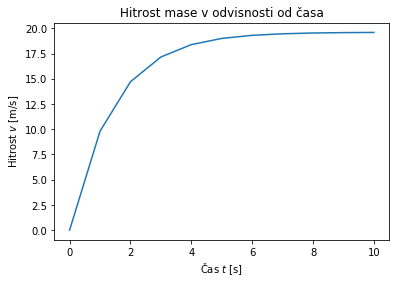

In [11]:
plt.plot(t, y)
plt.title('Hitrost mase v odvisnosti od časa')
plt.xlabel('Čas $t$ [s]')
plt.ylabel('Hitrost $v$ [m/s]')
plt.show()

Preverimo sedaj vpliv časovnega koraka:

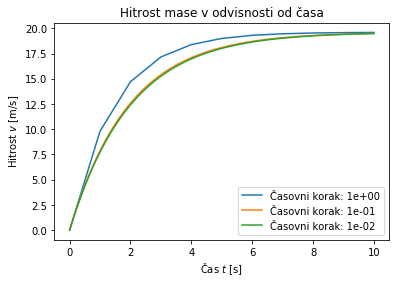

In [12]:
for n in [11, 101, 1001]:
    t = np.linspace(0, 10, n)
    y = euler(f_zračni_upor, t, y0=y0)
    plt.plot(t, y, label=f'Časovni korak: {t[1]:1.0e}')
plt.title('Hitrost mase v odvisnosti od časa')
plt.xlabel('Čas $t$ [s]')
plt.ylabel('Hitrost $v$ [m/s]')
plt.legend()
plt.show()

Opazimo, da se numerična napaka pri spremembi koraka iz 1 na 0.1 bistveno zmanjša!

Ocenimo še napako pri 100 in 1000 odsekih:

In [13]:
n=101
t = np.linspace(0, 10, n)
euler_napaka(f_zračni_upor, t, y0=y0)

In [14]:
n=1001
t = np.linspace(0, 10, n)
euler_napaka(f_zračni_upor, t, y0=y0)

Ko smo korak zmanjšali na desetino, se je proporcionalno zmanjšala tudi napaka (prvi red napake).

Poglejmo še primer, ko je zračni upor `c` argument funkcije `euler` in je prek `**kwargs` posredovan v funkcijo `f_zračni_upor()`:

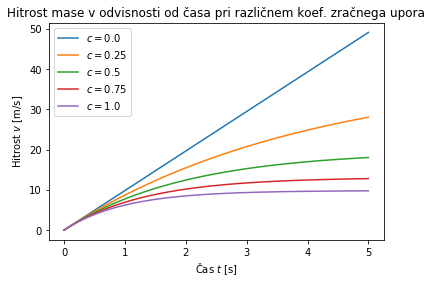

In [15]:
for c in np.linspace(0, 1, 5):
    t = np.linspace(0, 5, 1001)
    y = euler(f_zračni_upor, t, y0=y0, c=c)
    plt.plot(t, y, label=f'$c={c}$')
plt.title('Hitrost mase v odvisnosti od časa pri različnem koef. zračnega upora')
plt.xlabel('Čas $t$ [s]')
plt.ylabel('Hitrost $v$ [m/s]')
plt.legend()
plt.show()

# Metoda Runge-Kutta 2. reda

Eulerjeva metoda je 1. reda (1. reda je namreč globalna napaka $\mathcal{O}(h)$). Če bi želeli izpeljati red napake 2. reda, bi si morali pomagati z razvojem $y(t+h)$ v Taylorjevo vrsto, kjer bomo zanemarili 3. in višji odvod:

$$y(t+h)=y(t)+y'(t)\,h + \frac{1}{2}y''(t)\,h^2+\mathcal{O}(h^3).$$

Lokalna napaka metode bo tako reda 3, globalna pa reda 2.

Uporabimo zamenjavi $y'(t)=f(t,y)$ in $y''(t)=f'(t,y)$:
$$y(t+h)=y(t)+f(t,y)\,h + \frac{1}{2}f'(t,y)\,h^2+\mathcal{O}(h^3).$$

Ker je funkcija prvega odvoda $f(t,y)$ odvisna od neodvisne $t$ in odvisne spremenljivke $y$, moramo uporabiti pri odvajanju implicitno odvajanje:
$$f'(t,y)=\frac{\partial f}{\partial t}+\frac{\partial f}{\partial y}\,\underbrace{\frac{\textrm{d} y}{\textrm{d} t}}_{y'=f(t,y)}
=\frac{\partial f}{\partial t}+\frac{\partial f}{\partial y}\,{f(t, y)}.$$

Vstavimo v izraz za Taylorjevo vrsto:
$$y(t+h)_{\textrm{Taylor}}=y(t+h)=y(t)+f(t,y)\,h + \frac{1}{2}\,{\LARGE(}
\frac{\partial f}{\partial t}+\frac{\partial f}{\partial y}\,{f(t, y)}
{\LARGE)}\,h^2.$$

Kot je razvidno iz zgornjega izraza, potrebujemo dodatne odvode. To predstavlja določeno težavo, ki se ji lahko izognemo na različne načine; v nadaljevanju si bomo pogledali pristop *Runge-Kutta*. Ker bomo zgornji izraz pozneje še potrebovali, samo ga tukaj poimenovali $y(t+h)_{\textrm{Taylor}}$.

## Ideja pristopa Runge-Kutta

Zgornjo dilemo metoda *Runge-Kutta* (razvita leta 1901) rešuje z idejo, ki smo jo sicer že srečali pri Gaussovi integraciji: točnejšo rešitev poskuša najti s uteženo dodatno vrednostjo funkcije $f$:

$$y(t+h)_{\textrm{Runge-Kutta}}=y(t)+c_0\,f\left(t,y\right)\,h +c_1
\underbrace{f{\large(}t+p\,h,y+q\,h\,f(t,y){\large)}}_{A}\,h.$$

Kjer so $c_0$, $c_1$, $p$ in $q$ neznane konstante (načeloma od 0 do vključno 1). Če bi v zgornjem izrazu uporabili $c_1=0$, bi izpeljali metodo 1. reda; z dodatno funkcijsko vrednostjo ($A$) pa se bo izkazalo, da  bomo izpeljali metodo 2. reda. 

Iskanje neznanih konstant $c_0$, $c_1$, $p$, $q$ nadaljujemo z zapisom $A$ v obliki Taylorjeve vrste 1. reda:
$$f{\large(}t+p\,h,y+q\,h\,f(t,y){\large)}=
\underbrace{
f{\large(}t,y{\large)}+
\frac{\partial f}{\partial t}\,\left(p\,h\right)+
\frac{\partial f}{\partial y}\,\left(q\,h\,f(t, y)\right)
}_{B}.$$

Vstavimo sedaj izpeljani $B$ nazaj izraz za $y(t+h)_{\textrm{Runge-Kutta}}$:
$$y(t+h)_{\textrm{Runge-Kutta}}=y(t)+c_0\,f\left(t,y\right)\,h +c_1
{\LARGE(}
f{\large(}t,y{\large)}+
\frac{\partial f}{\partial t}\,\left(p\,h\right)+
\frac{\partial f}{\partial y}\,\left(q\,h\,f(t, y)\right)
{\LARGE)}
\,h.$$

Nadaljujemo z izpeljevanjem in enačbo preoblikujemo, da bo podobna zgoraj izpeljani s Taylorjevo vrsto $\mathbf{y}(t+h)_{\textrm{Taylor}}$:

$$y(t+h)_{\textrm{Runge-Kutta}}=y(t)+(c_0+c_1)\,f\left(t,y\right)\,h +\frac{1}{2}
{\LARGE(}
\frac{\partial f}{\partial t}\,2\,c_1\,p+
2\,c_1\,q\,\frac{\partial f}{\partial y}\,f(t, y)
{\LARGE)}
\,h^2.$$

Primerjajmo sedaj z zgoraj izpeljanim izrazom:
$$y(t+h)_{\textrm{Taylor}}=y(t)+f(t,y)\,h + \frac{1}{2}\,{\LARGE(}
\frac{\partial f}{\partial t}+\frac{\partial f}{\partial y}\,{f(t, y)}
{\LARGE)}\,h^2.$$

Ugotovimo, da za enakost mora veljati:

$$c_0+c_1=1,\qquad 2\,c_1\,p=1,\qquad 2\,c_1\,q=1.$$

Imamo torej tri enačbe in štiri neznanke. Eno od konstant si tako lahko poljubno izberemo, ostale tri pa izračunamo. Če si na primer izmislimo $c_0=0$, bi to imenovali *spremenjena Eulerjeva metoda* in bi ostali parametri bili: $c_1=1$, $p=q=1/2$. Izbira parametrov nima bistvenega vpliva rešitev. Sicer pa velja omeniti, da metodo Runge-Kutta 2. reda zelo redko uporabljamo, saj je metoda Runge-Kutta 4 reda bistveno bolj uporabna!

# Metoda Runge-Kutta 4. reda

Podobno kot smo izpeljali metodo Runge-Kutta 2. reda, se izpelje metodo Runge Kutta 4. reda. Tudi pri metodi 4. reda obstaja več različic in Runge-Kutta 4. reda je tipično definiramo kot:

$$y_{i+1}=y_i+\frac{1}{6}(k_0+2\,k_1+2\,k_2+k_3),$$
kjer so vektorji konstant:
$$\begin{align}
k_0&=h\,f(t_i,y_i)\\
k_1&=h\,f\left(t_i+\frac{h}{2},y_i+\frac{k_0}{2}\right)\\
k_2&=h\,f\left(t_i+\frac{h}{2},y_i+\frac{k_1}{2}\right)\\
k_3&=h\,f\left(t_i+h,y_i+k_2\right).
\end{align}
$$

Koraki metode Runge-Kutta 4 reda so:

1. Določitev $i=0$ in $t_0$, $y_0=y(t_0)$.
* Izračun koeficintov: $k_0$, $k_1$, $k_2$, $k_3$,
* Izračun vrednosti funkcije pri $t_{i+1}=t_i+h$:
$$y_{i+1}=y_i+\frac{1}{6}(k_0+2\,k_1+2\,k_2+k_3).$$
* $i=i+1$ in nadaljevanje v koraku 2.

## Napaka metode Runge-Kutta 4 reda

Metodo Runge-Kutta 4. reda imenujemo tako zato, ker ima lokalno napako 5. reda $\mathcal{O}(h^5)$, vendar pa to napako naredimo $n$-krat, zato je globalna napaka 4. reda $\mathcal{O}(h^4)$. 

### Ocena napake

Točen rezultat $y(t_n)$ pri velikosti koraka $h$ je:

$$y(t_n)=y_{n,h}+E_h,$$
kjer je $y_{n,h}$ numerični približek in $E_h$ napaka metode. Ker je globalna napaka četrtega reda, lahko napako definiramo kot:

$$E_h=k\,h^4,$$

Podobno lahko za velikost koraka $2h$ definiramo:

$$y(t_n)=y_{n,2h}+E_{2h},$$
kjer je $y_{n,2h}$ numerični približek in $E_{2h}$ napaka metode:

$$E_{2h}=k\,(2\,h)^4=16\,k\,h^4$$

Ob predpostavki, da je konstanta $k$ pri koraku $h$ in koraku $2h$ enaka, lahko določimo oceno napake pri boljšem približku $E_h$. Najprej izenačimo točna rezultata $y(t_n)$ koraka $h$ in $2h$:

$$y_{n,h}+k\,h^4=y_{n,2h}+16\,k\,h^4$$

sledi:

$$15\,k\,h^4=y_{n,h}-y_{n,2h}$$

in nato določimo *oceno napake*:

$$E_h=\frac{y_{n,h}-y_{n,2h}}{15}.$$

## Numerična implementacija

In [16]:
def runge_kutta_4(f, t, y0, *args, **kwargs):
    """
    Metoda Runge-Kutta 4. reda za reševanje diferencialne enačbe: y' = f(t, y)
    
    :param f: funkcija, ki jo kličemo s parametroma t in y in vrne 
              vrednost prvega odvoda
    :param t: ekvidistanten časovni vektor oz. neodvisna spremenljivka
    :param y0:začetna vrednost
    :param args: dodatni argumenti funkcije f (brezimenski)
    :param kwargs: dodatni argumenti funkcije f (poimenovani)
    :return y: funkcijske vrednosti.
    """
    def RK4(f, t, y, *args, **kwargs):
        k0 = h*f(t, y, *args, **kwargs)
        k1 = h*f(t + h/2.0, y + k0/2.0, *args, **kwargs)
        k2 = h*f(t + h/2.0, y + k1/2.0, *args, **kwargs)
        k3 = h*f(t + h, y + k2, *args, **kwargs)
        return (k0 + 2.0*k1 + 2.0*k2 + k3)/6.0
    
    y = np.zeros_like(t)
    y[0] = y0
    h = t[1]-t[0]

    for i, ti in enumerate(t[1:]):
        y[i+1] = y[i] + RK4(f, ti, y[i], *args, **kwargs)
        
    return y

Funkcija za oceno napake:

In [17]:
def runge_kutta_4_napaka(f, t, y0, *args, **kwargs):
    """ Ocena napake metode Runge Kutta 4; argumenti so isti kakor za funkcijo `runge_kutta_4`
    """
    n = len(t)
    if n < 5:
        raise Exception('Vozlišč mora biti vsaj 5.')
    if n%2==0: # sodo vozlišč; odstrani eno točko in spremeni na liho (da je sodo odsekov)
        n = n - 1
    y_h = runge_kutta_4(f, t[:n], y0, *args, **kwargs)
    y_2h = runge_kutta_4(f, t[:n:2], y0, *args, **kwargs)
    E_h = (y_h[-1] - y_2h[-1])/15
    return E_h

## Numerični primer

Poglejmo sedaj primer izračuna hitrosti mase, ki je izpostavljena zračnemu uporu:

In [18]:
def f_zračni_upor(t, y, g=9.81, m=1., c=0.5):
    return g-c*y/m

Definirajmo začetni pogoj in časovni vektor, kjer nas zanima rezultat:

In [19]:
y0 = 0
t = np.linspace(0, 10, 11)
t

array([  0.,   1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.])

In za primerjavo izračunajmo rešitev s funkcijo `euler` ter `runge_kutta_4`:

In [20]:
y_euler = euler(f_zračni_upor, t, y0=y0)
y_rk4 = runge_kutta_4(f_zračni_upor, t, y0=y0)

Prikažemo rezultat:

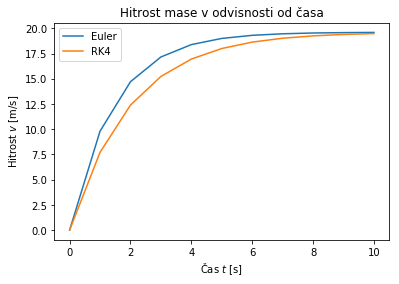

In [21]:
plt.plot(t, y_euler, label='Euler')
plt.plot(t, y_rk4, label='RK4')
plt.title('Hitrost mase v odvisnosti od časa')
plt.xlabel('Čas $t$ [s]')
plt.ylabel('Hitrost $v$ [m/s]')
plt.legend()
plt.show()

Pogljemo še numerično napako:

In [22]:
n=101
t = np.linspace(0, 10, n)
runge_kutta_4_napaka(f_zračni_upor, t, y0=y0)

In [23]:
n=1001
t = np.linspace(0, 10, n)
runge_kutta_4_napaka(f_zračni_upor, t, y0=y0)

Pri zmanjšanju koraka na desetino, se je napaka zmanjšala za cca. $10^4$ krat (kar ustreza pričakovanjem za metodo četrtega reda).

# Uporaba ``scipy`` za reševanje navadnih diferencialnih enačb

Paket `scipy` ima implementiranih veliko numeričnih metod za reševanje začetnih problemov navadnih diferencialnih enačb; tukaj si bomo pogledali dva pristopa:

* [`scipy.integrate.odeint`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.odeint.html)
* [`scipy.integrate.ode`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.ode.html)

## `scipy.integrate.odeint`

Funkcija `odeint` temelji na algoritmu *LSODA* iz t.i. [FORTRAN odepack](http://www.netlib.org/odepack/) in samodejno preklaplja med dvema algoritmom za ne-toge (metoda Adams) and toge (metoda BDF, backward differentiation formula) diferencialne enačbe.

Sintaksa za uporabo:
```python
scipy.integrate.odeint(func, y0, t, args=(), Dfun=None, 
col_deriv=0, full_output=0, ml=None, mu=None, rtol=None, 
atol=None, tcrit=None, h0=0.0, hmax=0.0, hmin=0.0, ixpr=0, 
mxstep=0, mxhnil=0, mxordn=12, mxords=5, printmessg=0)
```


Pojasnilo vseh argumentov je v [dokumentaciji](https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.odeint.html), tukaj bomo izpostavili nekatere:

* `func` je funkcija\* prvega odvoda (`func(y, t, ...)`)
* `y0` je začetna\* vrednost,
* `t` je numerično polje neodvisne spremenljivke, kjer iščemo funkcijsko vrednost,
* `args` je terka argumentov, ki jih lahko posredujemo v `func`

Tukaj sta potrebni dve opombi:

1. `func(y, t, ...)`: vrstni red argumentov, najprej `y`, nato `t`!
* `odeint` se lahko uporablja tudi za sistem diferencialnih enačb prvega reda (bomo spoznali spodaj) in takrat je `y` numerično polje vrednosti in ne skalar!

### Numerični primer

Poglejmo sedaj primer izračuna hitrosti mase, ki je izpostavljena zračnemu uporu; najprej pripravimo funkcijo za prvi odvo, ki bo imela zamenjana argumenta `t` in `y` (kakor zahteva `odeint`):

In [24]:
def f_zračni_upor_odeint(y, t, g=9.81, m=1., c=0.5):
    return g-c*y/m

Definirajmo začetni pogoj in časovni vektor, kjer nas zanima rezultat:

In [25]:
y0 = 0
t = np.linspace(0, 10, 101)
t

array([  0. ,   0.1,   0.2,   0.3,   0.4,   0.5,   0.6,   0.7,   0.8,
         0.9,   1. ,   1.1,   1.2,   1.3,   1.4,   1.5,   1.6,   1.7,
         1.8,   1.9,   2. ,   2.1,   2.2,   2.3,   2.4,   2.5,   2.6,
         2.7,   2.8,   2.9,   3. ,   3.1,   3.2,   3.3,   3.4,   3.5,
         3.6,   3.7,   3.8,   3.9,   4. ,   4.1,   4.2,   4.3,   4.4,
         4.5,   4.6,   4.7,   4.8,   4.9,   5. ,   5.1,   5.2,   5.3,
         5.4,   5.5,   5.6,   5.7,   5.8,   5.9,   6. ,   6.1,   6.2,
         6.3,   6.4,   6.5,   6.6,   6.7,   6.8,   6.9,   7. ,   7.1,
         7.2,   7.3,   7.4,   7.5,   7.6,   7.7,   7.8,   7.9,   8. ,
         8.1,   8.2,   8.3,   8.4,   8.5,   8.6,   8.7,   8.8,   8.9,
         9. ,   9.1,   9.2,   9.3,   9.4,   9.5,   9.6,   9.7,   9.8,
         9.9,  10. ])

In za primerjavo izračunajmo rešitev s funkcijo `runge_kutta_4` ter `odeint` (koeficient zračnega upora naj bo `c=0.7`):

In [26]:
from scipy.integrate import odeint

y_odeint = odeint(f_zračni_upor_odeint, y0=y0, t=t, args=(9.81,1.,0.7))
y_rk4 = runge_kutta_4(f_zračni_upor, t, y0=y0, c=0.7)

Poglejmo rezultat:

In [27]:
y_odeint[:5]

array([[ 0.        ],
       [ 0.94745234],
       [ 1.83085103],
       [ 2.6545265 ],
       [ 3.42251642]])

Ker je `odeint` že pripravljen za sistem navadnih diferencialnih enačb prvega reda, je rezultat podan v dveh dimenzijah; rezultat, ki je torej: `y_odeint[:,0]`.

Prikažemo rezultat:

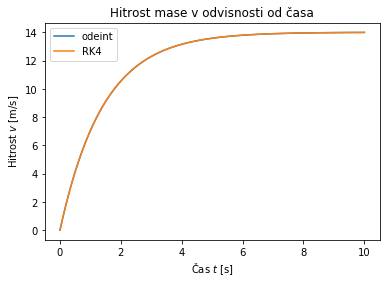

In [28]:
plt.plot(t, y_odeint[:,0], label='odeint')
plt.plot(t, y_rk4, label='RK4')
plt.title('Hitrost mase v odvisnosti od časa')
plt.xlabel('Čas $t$ [s]')
plt.ylabel('Hitrost $v$ [m/s]')
plt.legend()
plt.show()

## `scipy.integrate.ode`

`scipy` ponuja tudi bolj napredni integrator `ode`, ki pa temelji na objektnem pristopu in ponuja več prilagodljivosti kakor `odeint`. Instanco objekta dobimo s klicem:

* ``scipy.integrate.ode(f, jac=None)`` kjer je `f` funkcija prvega/ih odvoda/ov.

Metode objekta so:

* `integrate(t[, step, relax])` za izračun funkcijskih vrednosti `y`,
* `set_f_params(*args)` parametri funckije `f`,
* `set_initial_value(y[, t])` definiranje začetnih pogojev,
* `set_integrator(name, **integrator_params)` izbira metode,
* `set_jac_params(*args)`	parametri Jacobijeve matrike,
* `set_solout(solout)`	funkcija `solout`, ki se jo kliče pri vsakem uspešnem integracijskem koraku,
* `successful()` preveri ali je rešitev bila uspešna.

`ode` uporabimo v korakih ([dokumentacija](https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.ode.html)):

1. naredimo instanco `ode`: ``scipy.integrate.ode(f, jac=None)``,
2. definiramo metodo: metoda `set_integrator()`,
3. definiramo začetne vrednosti in parametre: metoda `set_initial_value()`,
4. izračunamo rešitev: metoda `integrate()`.

Velja izpostaviti, da je pri `ode` vrstni red argumentov funkcije `f(t, y, ...)` kar je drugače kakor pri `odeint` in konsistentno z izpeljavo pri `euler` in `runge_kutta_4`.

Naprej velja izpostaviti, da `ode` omogoča izbiro različnih metod: `'dopri5'`, `'vode'`, `'zvode'`, `'lsoda'`, `'dop853'`. Nekatere si bomo pogledali spodaj.

### Numerični primer

Nadaljujemo numerični primer iz prikaza uporabe funkcije `odeint`; najprej uvozimo razred `ode`:

In [29]:
from scipy.integrate import ode

in pripravimo instanco objekta:

In [30]:
y_ode = ode(f_zračni_upor)

Izberemo metodo, definiramo začetne pogoje in parametre:

In [31]:
y_ode.set_integrator('dopri5')
y_ode.set_initial_value(y0, t=t[0])
y_ode.set_f_params(9.81, 1., 0.7)

Kjer smo uporabili eksplicitno metodo Runge-Kutta reda 4 oz. 5 reda (`'dopri5'`). Metodo sta predstavila Dormand in Prince in izračuna rezultat z redom natančnosti 4 in 5 ter razliko uporabi za oceno napake metode 4. reda; napako potem izkoristi za prilagajanje velikosti koraka. 

In izračunamo rezultat:

In [32]:
y_ode.integrate(t[-1])

array([ 14.00150497])

Primerjamo z rezultatom `y_odeint`:

In [33]:
y_odeint[-1]

array([ 14.00150634])

Tukaj velja poudariti, da `ode` prilagaja korak, da se doseže zahtevana natančnost (podamo jo lahko kot parameter metode `set_integrator()`) in vrne samo končni rezultat! Če želimo tudi vmesne rezultate, to naredimo v zanki:

In [34]:
y_ode = ode(f_zračni_upor)
y_ode.set_integrator('dopri5')
y_ode.set_initial_value(y0, t=t[0])
y_ode.set_f_params(9.81, 1., 0.7)
t2 = t[::20] # samo vsak 10 časovni korak
rezultat = np.zeros_like(t2)
for i,čas in enumerate(t2):
    rezultat[i] = y_ode.integrate(čas)[0]

C:\Users\Janko\Anaconda3\lib\site-packages\scipy\integrate\_ode.py:1035: UserWarning: dopri5: step size becomes too small
  self.messages.get(idid, 'Unexpected idid=%s' % idid))


Rezultat ob času:

In [35]:
t2

array([  0.,   2.,   4.,   6.,   8.,  10.])

torej je:

In [36]:
rezultat

array([  0.        ,  10.55840489,  13.16207538,  13.80413252,
        13.96246214,  14.0015059 ])

# Sistem navadnih diferencialnih enačb

Zgoraj smo si pogledali reševanje začetnega problema ene navadne diferencialne enačbe; sedaj bomo reševanje posplošili na *začetni problem sistema navadnih diferencialnih enačb prvega reda*. 

Takšen sistem zapišemo:

$$\mathbf{y}'=\mathbf{f}(t, \mathbf{y}),$$

kjer so podani dodatni (začetni) pogoji:
$$\mathbf{y}(t_0)=\mathbf{y}_0.$$

$\mathbf{y}$ predstavlja tabelo funkcijskih vrednosti, $t$ neodvisno spremenljivko (ni nujno to vedno čas) in $\mathbf{f}$ vektor funkcij prvega odvoda. Začetne vrednosti pri neodvisni spremenljivki $t_0$ so: $\mathbf{y}_0$ 

## Numerična implementacija

Metodi Euler in Runge-Kutta 4.reda potrebujeta zgolj malenkostne popravke (`y0` je numerično polje `f` je sezna funkcij):

In [63]:
def euler_sistem(f, t, y0, *args, **kwargs):
    """
    Eulerjeva metoda za reševanje sistema navadnih diferencialnih enačb prvega reda : y' = f(t, y)
    
    :param f:  funkcija, ki jo kličemo s parametroma t in y in vrne seznam 
               vrednosti prvega odvoda
    :param t:  ekvidistantni (časovni) vektor neodvisne spremenljivke
    :param y0: seznam začetnih vrednosti
    :param args: dodatni argumenti funkcije f (brezimenski)
    :param kwargs: dodatni argumenti funkcije f (poimenovani)
    :return y: vrne np.array ``y`` funkcijskih vrednosti.
    """
    y = np.zeros((t.shape[0], len(y0)))
    y[0] = np.copy(y0)
    h = t[1]-t[0]
    for i, ti in enumerate(t[:-1]):
        # tukaj je bistvo Eulerjeve metode
        y[i+1] = y[i]+f(ti, y[i], *args, **kwargs)*h
    return y

In [64]:
def runge_kutta_4_sistem(f, t, y0, *args, **kwargs):
    """
    Metoda Runge-Kutta 4. reda za reševanje sistema navadnih diferencialnih enačb prvega reda: y' = f(t, y)
    
    :param f:  funkcija, ki jo kličemo s parametroma t in y in vrne seznam 
               vrednosti prvega odvoda
    :param t:  ekvidistantni (časovni) vektor neodvisne spremenljivke
    :param y0: seznam začetnih vrednosti
    :param args: dodatni argumenti funkcije f (brezimenski)
    :param kwargs: dodatni argumenti funkcije f (poimenovani)
    :return y: vrne np.array ``y`` funkcijskih vrednosti.
    """
    def RK4(g, t, y, *args, **kwargs):
        k0 = h*f(t, y, *args, **kwargs)
        k1 = h*f(t + h/2.0, y + k0/2.0, *args, **kwargs)
        k2 = h*f(t + h/2.0, y + k1/2.0, *args, **kwargs)
        k3 = h*f(t + h, y + k2, *args, **kwargs)
        return (k0 + 2.0*k1 + 2.0*k2 + k3)/6.0
    
    y = np.zeros((t.shape[0], len(y0)))
    y[0] = np.copy(y0)
    h = t[1]-t[0]

    for i, ti in enumerate(t[1:]):
        y[i+1] = y[i] + RK4(f, ti, y[i], *args, **kwargs)
        
    return y

## Numerični primer

Predhodno obravnavani primer mase na katero deluje zračni upor dopolnimo s prečno silo. Če predpodavimo, da upor zraka deluje samo v navpični smeri kot je prikazano na sliki:
<img width=250 src="fig/padanje_telesa_sila.png">

Glede na II. Newtonov zakon, zapišemo sistem dveh diferencialnih enačb prvega reda:

$$F=m\,v_x',$$
$$m\,g-c\,v_y=m\,v_y',$$
kjer je $F$ sila v horizontalni smeri, $m$ masa, $g$ gravitacijski pospešek, $c$ koeficient zračnega upora ter $v_x$ in $v_y$ hitrost v $x$ oz $y$ smeri. Diferencialno enačbo bi hoteli rešiti glede na začetni pogoj:

$$v_x(0)=v_y(0)=0\,\textrm{m/s}.$$

Da uskladimo oznake z oznakami zgoraj, uporabimo $\textbf{y}=[v_x, v_y]$. Seznamm funkcija prvega odvoda $\textbf{f}(t,\textbf{y})$ je:

$$\textbf{f}(t,\textbf{y})=[F/m, g-c\,y/m]$$

in začetni pogoj:
$$\textbf{y}=[0., 0.]$$

Definirajmo Python funkcijo prvega odvoda:

In [53]:
def f_zračni_upor_sila_odeint(y, t, F=1, g=9.81, m=1., c=0.5):
    return np.array([F/m, g-c*y[1]/m])

Reševali bomo tudi z `odeint`, zato še obrnemo argumenta: `y` in `t`:

In [54]:
def f_zračni_upor_sila(t, y, F=1, g=9.81, m=1., c=0.5):
    return np.array([F/m, g-c*y[1]/m])

Definirajmo začetni pogoj in časovni vektor, kjer nas zanima rezultat:

In [55]:
y0 = np.array([0., 0.])
t = np.linspace(0, 10, 101)
t[:5]

array([ 0. ,  0.1,  0.2,  0.3,  0.4])

In za primerjavo izračunajmo rešitev s funkcijo `runge_kutta_4` ter `odeint` (koeficient zračnega upora naj bo `c=0.7`):

In [57]:
y_RK4 = runge_kutta_4_sistem(f_zračni_upor_sila, y0=y0, t=t, F=1., c=0.7)
y_odeint = odeint(f_zračni_upor_sila_odeint, y0=y0, t=t, args=(1., 9.81,1.,0.7))

Poglejmo rezultat:

In [59]:
y_odeint[:5]

array([[ 0.        ,  0.        ],
       [ 0.1       ,  0.94745234],
       [ 0.2       ,  1.83085103],
       [ 0.3       ,  2.6545265 ],
       [ 0.4       ,  3.42251642]])

In [60]:
y_RK4[:5]

array([[ 0.        ,  0.        ],
       [ 0.1       ,  0.94745213],
       [ 0.2       ,  1.83085065],
       [ 0.3       ,  2.65452599],
       [ 0.4       ,  3.42251579]])

Prikažemo rezultat:

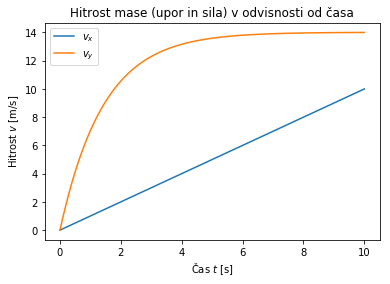

In [62]:
plt.plot(t, y_odeint[:,0], label='$v_x$')
plt.plot(t, y_odeint[:,1], label='$v_y$')
plt.title('Hitrost mase (upor in sila) v odvisnosti od časa')
plt.xlabel('Čas $t$ [s]')
plt.ylabel('Hitrost $v$ [m/s]')
plt.legend()
plt.show()

## Preoblikovanje diferencialne enačbe višjega reda v sistem diferencialnih enačb 1. reda

V nadaljevanju si bomo pogledali, kako navadno diferencialno enačbo poljubnega reda:

$$y^{(n)}=f(t, y, y', y'',\dots,y^{(n-1)}),$$

preoblikujemo v sistem diferencialnih enačb 1. reda.

Najprej namesto odvodov vpeljemo nove spremenljivke: 

$$y_i=y^{(i)}.$$

Diferencialna enačba $n$-tega reda zapisana z novimi spremenljivkami je:

$$y_n=f(t, y_0, y_1, y_2,\dots,y_{n-1}).$$

Nadaljujemo in nove spremenljivke odvajamo po neodvisni spremenljivki:

$$y_i'=y^{(i+1)}=y_{i+1}$$

Kar v izpisani obliki pomeni:
$$
\begin{array}{rcl}
y_0'&=&y_1\\
y_1'&=&y_2\\
&\dots\\
y_{n-1}'&=&y_n\\
\end{array}
$$

Izpeljali smo sistem diferencialnih enačb prvega reda, kjer v zadnji vrstici nastopa podana funkcija za odvod $n$-tega reda: $y_n=y^{n}=f(t, y_0, y_1,\dots,y_{n-1})$.

## Numerični primer

Doslej smo maso izpostavljeno gravitacijskemu pospešku in zračnemu uporu reševali kot diferencialno enačbo prvega reda. Vrnimo se na primer, ko ni prečne sile in jo zapišimo v obliki diferencialne enačbe 2. reda:
$$m\,g-c\,y'=m\,y'',$$
Diferencialno enačbo bi hoteli rešiti glede na začetni pogoj:

$$x(0\,\textrm{s})=0\,\textrm{m}\qquad x'(0\,\textrm{s})=0\,\textrm{m/s}.$$

Najprej moramo enačbo drugega reda:

$$y''=f(t, y, y') = g-c/m\,y'$$

preoblikovati na sistem dveh enačb prvega reda. Po navodilu zgoraj uporabimo $y_i=y^{i}$:

$$y''=y_2=f(t, y_0, y_1) = g-c/m\,y_1$$


Odvajamo $y_i'=y^{i+1}$ in pripravimo sistem enačb prvega reda:

$$
\begin{array}{rcl}
y_0'&=&y_1\\
y_1'&=&y_2\\
\end{array}
$$

Da uskladimo oznake z oznakami zgoraj, uporabimo $\textbf{y}=[y_0, y_1]$. Seznamm funkcija prvega odvoda $\textbf{f}(t,\textbf{y})$ je:

$$\textbf{f}(t,\textbf{y})=[y_1, g-c\,y_1/m]$$

in začetni pogoj:
$$\textbf{y}=[0., 0.]$$

Definirajmo Python funkcijo prvega odvoda (za funkcijo `odeint`):

In [78]:
def f_zračni_upor_2red_odeint(y, t, g=9.81, m=1., c=0.5):
    return np.array([y[1], g-c*y[1]/m])

Definirajmo začetni pogoj in časovni vektor, kjer nas zanima rezultat:

In [79]:
y0 = np.array([0., 0.])
t = np.linspace(0, 10, 101)
t[:5]

array([ 0. ,  0.1,  0.2,  0.3,  0.4])

Rešimo s funkcijo `odeint` (koeficient zračnega upora naj bo `c=0.7`):

In [80]:
y_odeint = odeint(f_zračni_upor_2red_odeint, y0=y0, t=t, args=(9.81,1.,0.7))

Poglejmo rezultat (prvi stolpec predstavlja $y_0$, torej lego, drugi stolpec pa $y_1$, torej hitrost):

In [81]:
y_odeint[:5]

array([[ 0.        ,  0.        ],
       [ 0.04792524,  0.94745233],
       [ 0.18735568,  1.83085102],
       [ 0.412105  ,  2.6545265 ],
       [ 0.7164051 ,  3.42251643]])

Prikažemo rezultat:

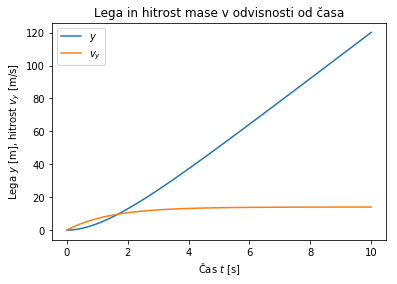

In [87]:
plt.plot(t, y_odeint[:,0], label='$y$')
plt.plot(t, y_odeint[:,1], label='$v_y$')
plt.title('Lega in hitrost mase v odvisnosti od časa')
plt.xlabel('Čas $t$ [s]')
plt.ylabel('Lega $y$ [m], hitrost $v_y$ [m/s]')
plt.legend()
plt.show()

## Numerični primer 2

Poglejmo si sedaj splošen ravninski primer padanja telesa, ki je izpostavljeno sili teže in zračnemu uporu:
<img width=250 src="fig/padanje_telesa_vezano.png">

Velikost sile upora zraka $\textbf{F}$ je sedaj definirana kot:
$$F=c\,v^2,$$
kjer je kvadrat hitrosti:
$$v^2=x'^2+y'^2.$$
Smer definira vektor hitrosti:
$$\tan(\alpha)=\frac{y'}{x'}$$

S pomočjo II. Newtonovega zakona zapišemo gibalni enačbi po komponentah:

$$
\begin{array}{rcl}
-c\,(x'^2+y'^2)\,\cos(\alpha)&=&m\,x''\\
m\,g-c\,(x'^2+y'^2)\,\sin(\alpha)&=&m\,y''
\end{array}
$$

Sistem diferencialnih enačb drugega reda želimo rešiti glede na začetne pogoje:

$$x(0\,\textrm{s})=y(0\,\textrm{s})=0\,\textrm{m}\qquad x'(0\,\textrm{s})=y'(0\,\textrm{s})=0\,\textrm{m/s}.$$

Imamo sistem dveh diferencialnih enačb drugega reda. Z uvedbo novih spremenljivk $y_i$: 

$y_0= x$, $y_1= x'$, $y_2= y$, $y_3= y'$.

Pripravimo sistem diferencialnih enačb prvega reda:
\begin{array}{rcl}
y_0'&=&y_1\\
y_1'&=&-c/m\,(y_1^2+y_3^2)\,\cos(\alpha)\\
y_2'&=&y_3\\
y_3'&=&g-c/m\,(y_1^2+y_3^2)\,\sin(\alpha)
\end{array}



Najprej moramo enačbo drugega reda:

$$y''=f(t, y, y') = g-c/m\,y'$$

preoblikovati na sistem dveh enačb prvega reda. Po navodilu zgoraj uporabimo $y_i=y^{i}$:

$$y''=y_2=f(t, y_0, y_1) = g-c/m\,y_1$$


Odvajamo $y_i'=y^{i+1}$ in pripravimo sistem enačb prvega reda:

$$
\begin{array}{rcl}
y_0'&=&y_1\\
y_1'&=&y_2\\
\end{array}
$$

Da uskladimo oznake z oznakami zgoraj, uporabimo $\textbf{y}=[y_0, y_1]$. Seznamm funkcija prvega odvoda $\textbf{f}(t,\textbf{y})$ je:

$$\textbf{f}(t,\textbf{y})=[y_1, g-c\,y_1/m]$$

in začetni pogoj:
$$\textbf{y}=[0., 0.]$$

Definirajmo Python funkcijo prvega odvoda (za funkcijo `odeint`):

In [78]:
def f_zračni_upor_2red_odeint(y, t, g=9.81, m=1., c=0.5):
    return np.array([y[1], g-c*y[1]/m])

Definirajmo začetni pogoj in časovni vektor, kjer nas zanima rezultat:

In [79]:
y0 = np.array([0., 0.])
t = np.linspace(0, 10, 101)
t[:5]

array([ 0. ,  0.1,  0.2,  0.3,  0.4])

Rešimo s funkcijo `odeint` (koeficient zračnega upora naj bo `c=0.7`):

In [80]:
y_odeint = odeint(f_zračni_upor_2red_odeint, y0=y0, t=t, args=(9.81,1.,0.7))

Poglejmo rezultat:

In [81]:
y_odeint[:5]

array([[ 0.        ,  0.        ],
       [ 0.04792524,  0.94745233],
       [ 0.18735568,  1.83085102],
       [ 0.412105  ,  2.6545265 ],
       [ 0.7164051 ,  3.42251643]])

Prikažemo rezultat:

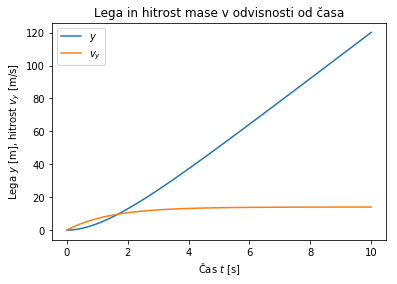

In [87]:
plt.plot(t, y_odeint[:,0], label='$y$')
plt.plot(t, y_odeint[:,1], label='$v_y$')
plt.title('Lega in hitrost mase v odvisnosti od časa')
plt.xlabel('Čas $t$ [s]')
plt.ylabel('Lega $y$ [m], hitrost $v_y$ [m/s]')
plt.legend()
plt.show()

**`ode` vs `odeint`**

`scipy.integrate.ode` omogoča izbiro različnih integratorjev (metod); zelo preprosta za uporabo pa je sicer funkcija  `scipy.integrate.odeint`, ki pa temelji na *lsoda* algoritmu (glejte help). 

`odeint` pričakuje najprej odvisne spremenljivke, nato neodvisne in je treba funkcijo 1. odvodov ustrezno definirati:

In [34]:
def F_klada_2(y, t):#odeint pričakuje najprej odvisne spremenljivke, nato neodvisne
    return F_klada(t, y)

In [35]:
cas2 = cas[::5] #bolj 'redek' čas, da se bo videlo numerično napako

In [36]:
resitev2 = odeint(F_klada_2, y_zacetni_pogoji, cas2)

In [37]:
resitev2[:5]

array([[ 0.        ,  1.        ],
       [ 0.19582278,  0.93864548],
       [ 0.3792507 ,  0.87729096],
       [ 0.55028377,  0.81593644],
       [ 0.70892199,  0.75458192]])

In [38]:
def slika():
    plt.plot(cas, pomik(cas), 'C0', label='Pomik - analitično [m]')
    plt.plot(cas, hitrost(cas), 'C1', label='Hitrost - analitično [m/s]')
    plt.plot(cas2, resitev2[:, 0], 'C0.', label='Pomik - odeint [m]')
    plt.plot(cas2, resitev2[:, 1], 'C1.', label='Hitrost - odeint [m/s]')
    plt.xlabel('Čas [s]')
    plt.ylabel('Pomik [m] / Hitrost [m/s]')
    plt.legend(loc=(1.01, 0));
    plt.show()

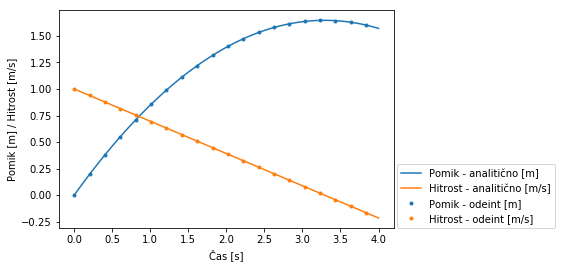

In [39]:
slika()

# Stabilnost reševanja diferencialnih enačb*

Preprosto povedano, je reševanje diferencialne enačbe stabilno, če se lokalne napake ne seštevajo v globalno napako, ki preraste vse meje. Globalna napaka torej mora ostati omejena. Stabilnost je pogojena z diferencialno enačbo, z uporabljeno numerično metodo in s korakom integracije $h$.

V nadaljevanju si bomo na primerih pogledali nekatere detajle.

## Primer preprostega nihala

Poglejmo si najprej primer reševanja diferencialne enačbe preprostega nihala. Slika (vir: Slavič, Dinamika, mehanska nihanja in mehanika tekočin, 2014):
<img src="./fig/Slavič-slika-3.6.png" width=150>
prikazuje dinamski sistem (masa $m$, togost $k$), katerega diferencialna enačba je
$$m\,\ddot x + k\,x=0.$$

Tako diferencialno enačbo preoblikujemo v standardno obliko lastnega nihanja:
$$\ddot x + \omega_0^2\,x=0,$$
kjer je lastna krožna frekvenca:
$$\omega_0=\sqrt{\frac{k}{m}}$$
in pričakujemo odziv oblike:
$$x(t)=A\,\cos(\omega_0\,t)+B\,\sin(\omega_0\,t)$$

Če so začetni pogoji enaki: $x(0\,\textrm{s})=x_0$ in $\dot x(0\,\textrm{s})=0\,\textrm{m/s}$, potem odziv pričakujemo v obliki:
$$x(t)=x_0\,\cos(\omega_0\,t)$$

### Numerični primer

Najprej definirajmo vektor začetnih pogojev in funkcijo prvih odvodov (diferencialno enačbo 2. reda pretvorimo v sistem diferencialnih enačb 1. reda $\mathbf{y}'=\mathbf{f}(x, \mathbf{y})$).

In [40]:
def F_nihalo(t, y, omega0=2*np.pi):
    """
    Funkcija prvih odvodov za nihalo z eno prostostno stopnjo
    
    :param t: čas
    :param y: seznam začetnih vrednosti
    :param omega: lastna krožna frekvenca
    :return y': seznam vrednosti odvodov
    """
    return np.array([y[1], -omega0**2*y[0]])

Podatki, analitična rešitev, Eulerjeva metoda in metoda Runge-Kutta 4. reda:

In [41]:
x0 = 1.
omega0 = 2*np.pi
x_zacetni_pogoji = np.array([x0, 0.])
t1 = 4.
t_Eu = np.linspace(0, t1, 10)
t_RK4 = t_Eu
dt = t_Eu[1]


cas = np.linspace(0, t1, 500)
pomik = x0*np.cos(omega0*cas) # analitična rešitev
hitrost = -x0*omega0*np.sin(omega0*cas) # analitična rešitev
x_Eu = euler(F_nihalo, t_Eu, x_zacetni_pogoji)
x_RK4 = runge_kutta_4(F_nihalo, t_RK4, x_zacetni_pogoji)

Rešitev po metodi RK45:

In [42]:
#%%timeit -n 1
solver = ode(F_nihalo).set_integrator('dopri5').set_initial_value(x_zacetni_pogoji)
solver.set_f_params(omega0)
t_RK4_sci = [0]
x_RK4_sci = [x_zacetni_pogoji]
while solver.successful() and solver.t < t1:
    solver.integrate(solver.t+dt)
    t_RK4_sci.append(solver.t)
    x_RK4_sci.append(solver.y)
t_RK4_sci = np.array(t_RK4_sci)
x_RK4_sci = np.array(x_RK4_sci)

Rešitev po implicitni metodi tipa Adams:

In [43]:
#%%timeit -n 1
solver = ode(F_nihalo).set_integrator('lsoda').set_initial_value(x_zacetni_pogoji)
solver.set_f_params(omega0)
t_imp_sci = [0]
x_imp_sci = [x_zacetni_pogoji]
while solver.successful() and solver.t < t1:
    solver.integrate(solver.t+dt)
    t_imp_sci.append(solver.t)
    x_imp_sci.append(solver.y)
t_imp_sci = np.array(t_imp_sci)
x_imp_sci = np.array(x_imp_sci)

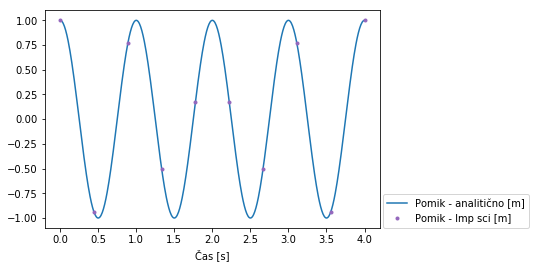

In [44]:
plt.plot(cas, pomik, 'C0', label='Pomik - analitično [m]')
#plt.plot(t_Eu[:5], x_Eu[:5, 0], 'C1o', label='Pomik - Euler [m] - začetek')
#plt.plot(t_Eu, x_Eu[:, 0], 'C2x', label='Pomik - Euler [m]')
#plt.plot(t_RK4, x_RK4[:, 0], 'C2o', label='Pomik - RK4 [m]')
#plt.plot(t_RK4_sci, x_RK4_sci[:, 0], 'C3o', label='Pomik - RK4 sci [m]')
plt.plot(t_imp_sci, x_imp_sci[:, 0], 'C4.', label='Pomik - Imp sci [m]')
plt.xlabel('Čas [s]')
plt.legend(loc=(1.01, 0));

### Zakaj je Eulerjeva metoda tako nestabilna?

In [45]:
x_Eu[:10,0]

array([  1.00000000e+00,   1.00000000e+00,  -6.79820595e+00,
        -2.23946178e+01,   1.50227803e+01,   2.27078020e+02,
         3.21982526e+02,  -1.35391414e+03,  -5.54069685e+03,
         8.30621721e+02])

Spomnimo se temeljnega izraza Eulerjeve metode:
$$y(t+h)=y(t)+y'(t)\,h.$$

Sedaj razumemo, da v prvi točki ($y'(0)=0$) naredimo relativno veliko napako, vendar zakaj potem začne vrednost alternirajoče naraščati?

Spomnimo se, da je analitična rešitev $y(t)=y_0=x(t)=x_0\,\cos(\omega_0\,t)$ in je torej $y'(t)=y_1=\dot x(t)=-\omega_0\,x_0\,\sin(\omega_0\,t)$. Vstavimo pripravljena izraza v Eulerjevo metodo in uredimo:
$$y(t+h)=y(t)+y'(t)\,h=x_0\,\left(\cos(\omega_0\,t)-\omega_0\,h\,\sin(\omega_0\,t)\right).$$

Predpostavimo, da gledamo stanje ob takem času $t$, da velja $\cos(\omega_0\,t)=0$ in $\sin(\omega_0\,t)=1$:
$$y(t+h)=x_0\,\underbrace{\left(-\omega_0\,h\right)}_{A}.$$
V kolikor bo absolutna vrednost izraza $A$ večja kot 1, bo pri času $t+h$ vrednost večja kot v predhodnem koraku in v sledečem verjetno spet. Sledi, da lahko pride do nestabilnosti. Da se je izognemo, mora veljati:
$$|A|<1\qquad\rightarrow\qquad h<\frac{1}{\omega_0}.$$

Opomba: v nekaterih knjigah boste videli tudi vrednost $h<2/\omega_0$; enoliče meje za vse diferencialne enačbe ni mogoče definirati; v splošnem pa velja, da je korak definiran relativno glede na najkrajšo periodo $T$ v diferencialni enačbi (npr.: $h<2/\omega_0$ je v bistvu enako $h<2/(2\pi/T)$ oziroma $h<T/\pi$). Perioda $T$ je definirana glede na najvišjo lastno frekvenco sistema $T=1/f_{\textrm{max}}$, ki jo izračunamo iz lastne vrednosti sistema.

Kot je prikazano zgoraj, imajo naprednejše metode reševanja diferencialnih enačb (npr. metodi Dormand-Prince in Runge-Kutta) vgrajen adaptiven časovni korak, ki ponavadi zagotavlja stabilno rešitev. Implicitne metode so načeloma bolj stabilne, vendar pa je cena večja numerična zahtevnost.

## Primer Van der Polovega nihala

http://en.wikipedia.org/wiki/Van_der_Pol_oscillator

Definirajmo seznam odvodov:

In [46]:
def F_van_der_pol(t, y, mu=1000):
    """
    Funkcija prvih odvodov za Van der Pol nihalo
    
    :param t: čas
    :param y: seznam začetnih vrednosti
    :param mu: parameter dušenja in nelinearnosti
    :return y': seznam vrednosti odvodov
    """
    return np.array([y[1], mu*(1-y[0]**2)*y[1]-y[0]])

In [47]:
x_zacetni_pogoji = np.array([1.5, 0.])
dt = 0.1
t1 = 3000

Rešitev po metodi RK45:

In [48]:
#%%timeit -n 1
solver = ode(F_van_der_pol).set_integrator('dopri5').set_initial_value(x_zacetni_pogoji)
t_RK4_sci = [0]
x_RK4_sci = [x_zacetni_pogoji]
while solver.successful() and solver.t < t1/6:# računamo samo do 1/6 časa!!!
    solver.integrate(solver.t+dt)
    t_RK4_sci.append(solver.t)
    x_RK4_sci.append(solver.y)
t_RK4_sci = np.array(t_RK4_sci)
x_RK4_sci = np.array(x_RK4_sci)

Rešitev po implicitni metodi tipa Adams:

In [49]:
#%%timeit -n 1
solver = ode(F_van_der_pol).set_integrator('lsoda').set_initial_value(x_zacetni_pogoji)
t_imp_sci = [0]
x_imp_sci = [x_zacetni_pogoji]
while solver.successful() and solver.t < t1:
    solver.integrate(solver.t+dt)
    t_imp_sci.append(solver.t)
    x_imp_sci.append(solver.y)
t_imp_sci = np.array(t_imp_sci)
x_imp_sci = np.array(x_imp_sci)
solver.successful()

True

Rešitev s pomočjo funkcije ``odeint`` (uporablja isto implicitno metodo `lsoda` kot zgoraj, poleg moramo definirati, pri katerih časovnih korakih nas zanima rešitev).

In [50]:
def F_van_der_pol_2(y, t):#odeint pričakuje najprej odvisne spremenljivke, nato neodvisne
    return F_van_der_pol(t, y, mu=1000)

In [51]:
#%%timeit -n 1
time = dt*np.arange(t1/dt)
result = odeint(F_van_der_pol_2, x_zacetni_pogoji, time)

Prikaz rezultatov:

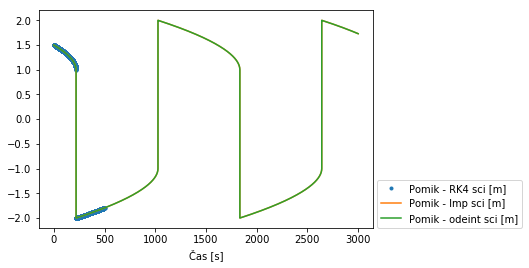

In [52]:
plt.plot(t_RK4_sci, x_RK4_sci[:, 0], 'C0.', label='Pomik - RK4 sci [m]')
plt.plot(t_imp_sci, x_imp_sci[:, 0], 'C1-', label='Pomik - Imp sci [m]')
plt.plot(time, result[:, 0], 'C2-', label='Pomik - odeint sci [m]')
plt.xlabel('Čas [s]')
plt.legend(loc=(1.01, 0));

# Nekaj vprašanj za razmislek!

1. Na sliki (vir: Numerical Methods in Engineering With Python 3, 3rd Ed, Jaan Kiusalaas) je prikazan izstrelek mase $m$, ki ga izstrelimo s hitrosjo $v_0$ pod kotom $\alpha$. Če je sila upora zraka: $F=c\,v^{3/2}$, potem sta gibalni enačbi:
$$\ddot x(t)=-F\,\cos(\alpha)/m\qquad\ddot y(t)=-F\,\sin(\alpha)/m-g.$$
Opomba: $v=\sqrt{\dot x^2+\dot y^2}.$ Ustrezne parametre si izmislite.
<img src="./fig/Jaan_Kiusalaas_stran_265_n13.png" width=300>
Sistem dveh diferencialnih enačb 2. reda zapišite v sistem diferencialnih enačb 1. reda.
* Določite vektor začetnih pogojev, ki smo ga zgoraj označili z $\mathbf{y}$.
* Določite funkcijo 1. odvodov, ``c`` naj bo parameter.
* Definirajte začetne pogoje in rešite nalogo s poljubnimi podatki.
* Prikažite $(x, y)$ lego masne točke, spreminjajte koeficient upora $c$.
* Prikažite hitrost v odvisnosti od časa. Določite minimum hitrosti in čas, pri katerem nastane.
* Na vaje prinesite poljubno diferencialno enačbo in bodite pripravljeni na numerično reševanje!

## Simbolno reševanje diferencialne enačbe drugega reda

Pogledali si bomo primer, prikazan na sliki, kjer je masa $m$ na klancu naklona $\alpha$. Koeficient trenja je $\mu$, težnostni pospešek pa $g$. Začetna hitrost je $\dot y(0\,\textrm{s})=v_0$, pomik $y(0\,\textrm{s})=0\,\textrm{m}$
<img src="./fig/masa_na_klancu.png" width=350>
Gibalna enačba (samo za smer $y$) je definirana glede na II. Newtonov zakon (glejte diagram sil na prosto telo).

### Izpeljava gibalne enačbe

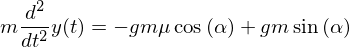

In [2]:
m, mu, g, alpha, y, t, v0 = sym.symbols('m, mu, g, alpha, y, t, v0')
eq = sym.Eq(m*y(t).diff(t,2),  m*g*sym.sin(alpha)-m*g*sym.cos(alpha)*mu)
eq

Rešitev enačbe je:

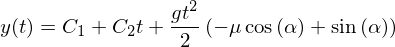

In [3]:
dsol = sym.dsolve(eq, y(t))
dsol

Da določimo $C_1$ in $C_2$, vstavimo $t=0\,\textrm{s}$:

In [4]:
dsol.args[1].subs(t, 0)

nato odvajamo po času in ponovno vstavimo $t=0\,\textrm{s}$:

In [5]:
dsol.args[1].diff(t).subs(t, 0)

Glede na začetne pogoje smo torej določili konstante:

In [6]:
zacetni_pogoji = {'C1': 0, 'C2': v0}

Sledi rešitev:

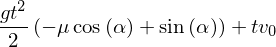

In [7]:
resitev = dsol.args[1].subs(zacetni_pogoji)
resitev

Pripravimo si funkciji za numerični klic:

In [8]:
podatki = {mu: 0.3, alpha: 15*np.pi/180, v0: 1., g: 9.81} #tukaj uporabimo np.pi, da imamo numerično vrednost

pomik = sym.lambdify(t, resitev.subs(podatki), 'numpy')
hitrost = sym.lambdify(t, resitev.diff(t).subs(podatki), 'numpy')

print('Pomik pri 0s: {:g}m'.format(pomik(0)))
print('Hitrost pri 0s: {:g}m/s'.format(hitrost(0)))

Pomik pri 0s: 0m
Hitrost pri 0s: 1m/s


Pripravimo prikaz:

In [9]:
cas = np.linspace(0, 4, 100)
cas2 = np.linspace(0, 4, 5)

In [10]:
def slika():
    plt.plot(cas, pomik(cas), 'C0', label='Pomik [m]')
    plt.plot(cas, hitrost(cas), 'C1', label='Hitrost [m/s]')
    plt.plot(cas2, pomik(cas2), 'C0o', label='Pomik - velik korak[m]')
    plt.plot(cas2, hitrost(cas2), 'C1o', label='Hitrost - velik korak [m/s]')
    plt.xlabel('Čas [s]')
    plt.ylabel('Pomik [m] / Hitrost [m/s]')
    plt.legend(loc=(1.01, 0));
    plt.show()

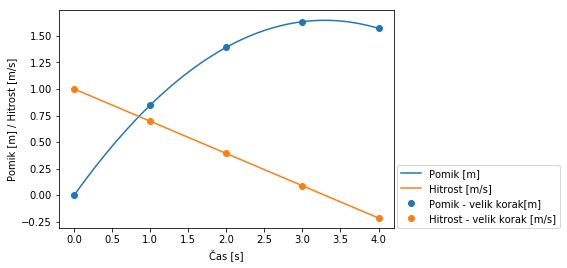

In [11]:
slika()

### Simbolno preoblikovanje diferencialne enačbe v sistem diferencialnih enačb 1. reda

Spomnimo se izvorne diferencialne enačbe:

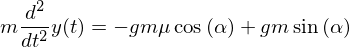

In [12]:
eq

Definirajmo nove spremenljivke in pripravimo funkcijo $f$:

In [13]:
y0, y1 = sym.symbols('y:2')
f = sym.simplify(eq.args[1]/m)
f

Povežimo sedaj nove spremenljivke.

$d y_0/dt$ naj bo enako $y_1$:

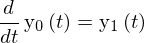

In [14]:
eq1 = sym.Eq(y0(t).diff(t), y1(t))
eq1

Odvod $d y_1/dt$ (v bistvu je to $y''$) naj bo enak funkciji $f$:

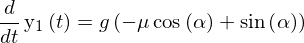

In [15]:
eq2 = sym.Eq(y1(t).diff(t), f)
eq2

Zgornje izraze zapišemo v vektorski obliki:
$$\mathbf{y}'=\mathbf{f}(t, \mathbf{y}).$$

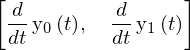

In [16]:
y_odvod = [y0(t).diff(t), y1(t).diff(t)]
y_odvod

In [17]:
f_vec = [y1(t), f]
f_vec

Spomnimo se sedaj ``f_vec``:

In [19]:
f_vec

Če rešujemo numerično, potem funkcijo $\mathbf{f}(t, \mathbf{y})$ zapišemo:

In [20]:
pospesek = float((eq.args[1]/m).simplify().subs(podatki))
pospesek #raziščite zakaj smo tukaj tako definirali! namig: type(pospesek)

In [21]:
def F_klada(t, y):
    return np.array([y[1], pospesek],dtype=float)

Preverimo funkcijo pri začetnem času $t=0\,$s in pri začetnih pogoji $[y_0, y_1]=[0, v_0]$:

In [22]:
y_zacetni_pogoji = np.array([0, podatki[v0]])
y_zacetni_pogoji

array([ 0.,  1.])

In [23]:
F_klada(0., y_zacetni_pogoji)

array([ 1.        , -0.30370487])

Uporabimo sedaj Eulerjevo metodo:

In [24]:
#%%timeit
x_Eu = np.linspace(0, 4, 5)
y_Eu = euler(F_klada, x_Eu, np.array([0, 1.]))
y_Eu

array([[ 0.        ,  1.        ],
       [ 1.        ,  0.69629513],
       [ 1.69629513,  0.39259025],
       [ 2.08888538,  0.08888538],
       [ 2.17777075, -0.2148195 ]])

Prikažemo in primerjamo z analitično rešitvijo:

In [25]:
def narisi_euler(n=5):
    x_Eu = np.linspace(0, 4, n)
    y_Eu = euler(F_klada, x_Eu, np.array([0, 1.]))
    plt.title('Eulerjeva metoda s korakom $h={:g}$'.format(x_Eu[1]-x_Eu[0]))
    plt.plot(cas, pomik(cas), 'C0', label='Pomik - analitično [m]')
    plt.plot(cas, hitrost(cas), 'C1', label='Hitrost - analitično [m/s]')
    plt.plot(x_Eu, y_Eu[:, 0], 'C0.', label='Pomik - Euler [m]')
    plt.plot(x_Eu, y_Eu[:, 1], 'C1.', label='Hitrost - Euler [m/s]')
    plt.xlabel('Čas [s]')
    plt.ylabel('Pomik [m] / Hitrost [m/s]')
    plt.ylim(-0.5, 2.5)
    plt.legend(loc=(1.01, 0))
    plt.show();

In [26]:
interact(narisi_euler, n=(3, 10, 1));